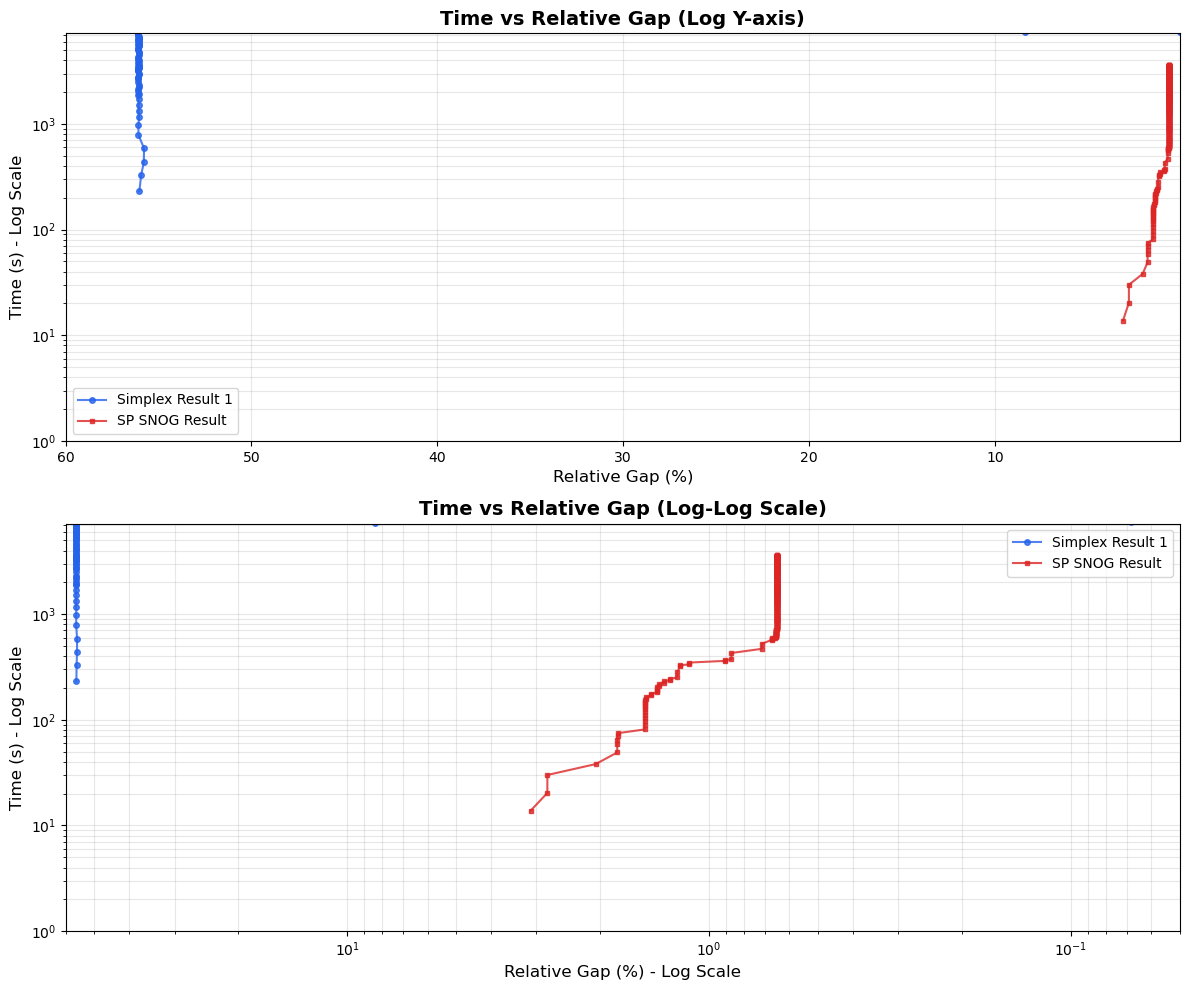


SUMMARY STATISTICS

Simplex Result 1:
  - Time range: 230.45s to 7900.91s
  - Gap range: 0.0583% to 56.0924%
  - Final gap: 0.0583%

SP SNOG Result:
  - Time range: 6.57s to 3600.18s
  - Gap range: 0.6479% to 3.1154%
  - Final gap: 0.6479%


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV files
df_simplex = pd.read_csv('simplex_result_1.csv')
df_snog = pd.read_csv('sp_snog_result.csv')

# Parse the Rel. Gap column (remove % and convert to float)
def parse_rel_gap(gap_str):
    if isinstance(gap_str, str):
        # Handle 'inf%' case
        if 'inf' in gap_str.lower():
            return np.inf
        return float(gap_str.replace('%', ''))
    return float(gap_str)

# Extract time and relative gap
simplex_time = df_simplex['Time (s)'].values
simplex_gap = df_simplex['Rel. Gap'].apply(parse_rel_gap).values

snog_time = df_snog['Time (s)'].values
snog_gap = df_snog['Rel. Gap'].apply(parse_rel_gap).values

# Filter out inf values for plotting
simplex_mask = np.isfinite(simplex_gap)
snog_mask = np.isfinite(snog_gap)

# Create figure with 2 subplots (vertically stacked)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# ============ Plot 1: Log Y-axis, Normal X-axis ============
ax1.plot(simplex_gap[simplex_mask], simplex_time[simplex_mask], 
         'o-', label='Simplex Result 1', color='#2563eb', markersize=4, alpha=0.8)
ax1.plot(snog_gap[snog_mask], snog_time[snog_mask], 
         's-', label='SP SNOG Result', color='#dc2626', markersize=3, alpha=0.8)

ax1.set_yscale('log')
ax1.set_xlim(60, 0.05)  # X-axis from 60% to 0.05% to include all simplex data
ax1.set_ylim(1, 7200)  # Y-axis from 1 to 7200 (log scale can't start at 0)
ax1.set_xlabel('Relative Gap (%)', fontsize=12)
ax1.set_ylabel('Time (s) - Log Scale', fontsize=12)
ax1.set_title('Time vs Relative Gap (Log Y-axis)', fontsize=14, fontweight='bold')
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3, which='both')

# ============ Plot 2: Log-Log (Both axes logarithmic) ============
# Filter out zero or negative values for log scale
simplex_mask_log = simplex_mask & (simplex_gap > 0)
snog_mask_log = snog_mask & (snog_gap > 0)

ax2.plot(simplex_gap[simplex_mask_log], simplex_time[simplex_mask_log], 
         'o-', label='Simplex Result 1', color='#2563eb', markersize=4, alpha=0.8)
ax2.plot(snog_gap[snog_mask_log], snog_time[snog_mask_log], 
         's-', label='SP SNOG Result', color='#dc2626', markersize=3, alpha=0.8)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(60, 0.05)  # X-axis from 60% to 0.05% to include all simplex data
ax2.set_ylim(1, 7200)  # Y-axis from 1 to 7200 (log scale can't start at 0)
ax2.set_xlabel('Relative Gap (%) - Log Scale', fontsize=12)
ax2.set_ylabel('Time (s) - Log Scale', fontsize=12)
ax2.set_title('Time vs Relative Gap (Log-Log Scale)', fontsize=14, fontweight='bold')
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

# Print summary statistics
print('\n' + '='*60)
print('SUMMARY STATISTICS')
print('='*60)
print(f'\nSimplex Result 1:')
print(f'  - Time range: {simplex_time.min():.2f}s to {simplex_time.max():.2f}s')
print(f'  - Gap range: {simplex_gap[simplex_mask].min():.4f}% to {simplex_gap[simplex_mask].max():.4f}%')
print(f'  - Final gap: {simplex_gap[simplex_mask][-1]:.4f}%')
print(f'\nSP SNOG Result:')
print(f'  - Time range: {snog_time.min():.2f}s to {snog_time.max():.2f}s')
print(f'  - Gap range: {snog_gap[snog_mask].min():.4f}% to {snog_gap[snog_mask].max():.4f}%')
print(f'  - Final gap: {snog_gap[snog_mask][-1]:.4f}%')